In [20]:
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [21]:
objek = 'hand'

In [22]:
def prepare_data(file_name):
    df = pd.read_csv(r'{}'.format(file_name), names=["path", "target"])
    print(df["path"].head())
    np.where(df.applymap(lambda x: x == ''))
    
    # X Input Data
    image_list = []

    for path in df['path'] :
#         print(path) 
        image_arr = cv2.imread(path)
        image_224x224 = cv2.resize(image_arr, (150, 150))
        image_list.append(image_224x224.astype('float')) 
    X = np.array(image_list)
    print("Total Data = ", X.shape)

    # Y Output Data
    encoder = LabelEncoder()
    Targets = encoder.fit_transform(df['target'])
    n_classes = 2
    Y = to_categorical(Targets, num_classes = n_classes)
    
    return X, Y

In [23]:
X, Y = prepare_data("{}_with_label_randomized.csv".format(objek))
X = X/255
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, random_state=13)
print("Data Train", X_train.shape)
print("Data Val", X_val.shape)

0    MURA-v1.1/train/XR_HAND/patient10169/study1_ne...
1    MURA-v1.1/train/XR_HAND/patient10121/study1_po...
2    MURA-v1.1/train/XR_HAND/patient09111/study1_ne...
3    MURA-v1.1/train/XR_HAND/patient11008/study1_ne...
4    MURA-v1.1/train/XR_HAND/patient09780/study1_po...
Name: path, dtype: object
Total Data =  (5543, 150, 150, 3)
Data Train (4711, 150, 150, 3)
Data Val (832, 150, 150, 3)


In [24]:
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import tensorflow as tf 
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(2, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [25]:
save_at = "Inception_Model/inception_{}.h5".format(objek)
save_best = ModelCheckpoint (save_at, monitor='val_acc', verbose=0, save_best_only=True, save_weights_only=False, mode='max')
hist = model.fit(X_train, Y_train, validation_data = (X_val, Y_val), callbacks=[save_best], batch_size=256, epochs = 100)

Train on 4711 samples, validate on 832 samples
Epoch 1/100
4711/4711 [==============================] - 12s 3ms/sample - loss: 1.9623 - acc: 0.6549 - val_loss: 1.0825 - val_acc: 0.7428
Epoch 2/100
4711/4711 [==============================] - 4s 842us/sample - loss: 0.5844 - acc: 0.7139 - val_loss: 1.4371 - val_acc: 0.7428
Epoch 3/100
4711/4711 [==============================] - 4s 844us/sample - loss: 0.5385 - acc: 0.7493 - val_loss: 1.1116 - val_acc: 0.7428
Epoch 4/100
4711/4711 [==============================] - 5s 1ms/sample - loss: 0.5295 - acc: 0.7567 - val_loss: 0.6323 - val_acc: 0.7440
Epoch 5/100
4711/4711 [==============================] - 4s 899us/sample - loss: 0.4707 - acc: 0.7680 - val_loss: 0.7515 - val_acc: 0.7440
Epoch 6/100
4711/4711 [==============================] - 4s 866us/sample - loss: 0.4490 - acc: 0.7949 - val_loss: 0.9825 - val_acc: 0.7428
Epoch 7/100
4711/4711 [==============================] - 4s 858us/sample - loss: 0.3869 - acc: 0.8332 - val_loss: 0.8403 -

4711/4711 [==============================] - 4s 854us/sample - loss: 0.0061 - acc: 0.9996 - val_loss: 1.5452 - val_acc: 0.7464
Epoch 60/100
4711/4711 [==============================] - 4s 867us/sample - loss: 0.2442 - acc: 0.9493 - val_loss: 1.6395 - val_acc: 0.7452
Epoch 61/100
4711/4711 [==============================] - 4s 858us/sample - loss: 0.0077 - acc: 0.9994 - val_loss: 1.8436 - val_acc: 0.7464
Epoch 62/100
4711/4711 [==============================] - 4s 848us/sample - loss: 0.0062 - acc: 0.9992 - val_loss: 1.1078 - val_acc: 0.6154
Epoch 63/100
4711/4711 [==============================] - 4s 849us/sample - loss: 0.1431 - acc: 0.9820 - val_loss: 1.8118 - val_acc: 0.7476
Epoch 64/100
4711/4711 [==============================] - 4s 845us/sample - loss: 0.0069 - acc: 0.9998 - val_loss: 2.4414 - val_acc: 0.7476
Epoch 65/100
4711/4711 [==============================] - 4s 851us/sample - loss: 0.1211 - acc: 0.9839 - val_loss: 3.8796 - val_acc: 0.7428
Epoch 66/100
4711/4711 [=========

In [26]:
# model.save('vgg_{}_81_float.h5'.format(objek))

In [27]:
X_test, Y_test = prepare_data("{}_val_path_label.csv".format(objek))
# X_test, Y_test = prepare_data("finger_val_path_label.csv")

0    MURA-v1.1/valid/XR_HAND/patient11365/study1_ne...
1    MURA-v1.1/valid/XR_HAND/patient11601/study1_ne...
2    MURA-v1.1/valid/XR_HAND/patient11597/study1_ne...
3    MURA-v1.1/valid/XR_HAND/patient11519/study1_po...
4    MURA-v1.1/valid/XR_HAND/patient11509/study1_po...
Name: path, dtype: object
Total Data =  (460, 150, 150, 3)


In [28]:
model_load = load_model("Inception_Model/inception_{}.h5".format(objek))
score = model_load.evaluate(X_test, Y_test, verbose=0)
print('Accuracy over the test set: \n ', round((score[1]*100), 2), '%')

Accuracy over the test set: 
  58.91 %


In [29]:
Y_pred = model_load.predict(X_test/255)

In [30]:
X_test.shape

(460, 150, 150, 3)

<Figure size 432x288 with 0 Axes>

(<matplotlib.image.AxesImage at 0x170913ad7c8>, (-0.5, 149.5, 149.5, -0.5))

NameError: name 'encoder' is not defined

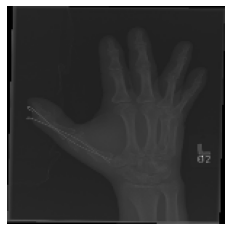

In [31]:
np.random.seed(89)
for rand_num in np.random.randint(0, len(Y_test), 15):
  plt.figure()
  plt.imshow(X_test[rand_num].astype('int')), plt.axis('off')
  if np.where(Y_pred[rand_num] == 1)[0].sum() == np.where(Y_test[rand_num] == 1)[0].sum():
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='g')
  else :
    plt.title(encoder.classes_[np.where(Y_pred[rand_num] == 1)[0].sum()], color='r')